**Providence College Turnaround** <br /> 
I am a big Providence College Basketball fan, and they have recently seen a big turnaround as a team. Starting from the 2018 season, and culminating in an incredible 6 game winning streak at the end of the 2019 season, Providence College Men's Basketball saw their season net ranking go from 157 (December Net Rankings) to 37 (Final March Net Rankings), which next to guarenteed their spot in the NCAA Men's Basketball Tournament, or March Madness, before it was cancelled. As a fan of the team, there were clear attributes to PC's game that lead to success. Specifically, increased offensive rebounding and defensive efficiency (expected points allowed per 100 possessions). My goal with this project is to: 
1. See if Providence College's turnaround had a significant correlation to their increase in offensive rebounding and defensive efficiency(opponent fg attempts and percentage) 
2. To see if any other teams made a similar jump in ranking over this same period of time
3. To see what statistics lead to said tems jump in ranking
4. Finally, to see if we can define certain statistics that help mediocre teams turn into March Madness contenders

## My Findings:
Through my research I found a strong correlation between defensive efficiency and game results as well as total rebound percentage and game results. The defensive efficiency findings turned out to be significant, other than Creighton's results. <br /> 
<br /> 
For the players, I found that their jumps in total rebounding percentage were statistically significant compared to their career averages, but I could not test their jump in statistics in comparison to results.

## My two hypothesis: <br />
1. I tested multiple statistics (defensive and rebounding) with all of the teams I found that made a large jump over the two seasons in terms of rankings. I made a huge data set of all of the teams data and split it up into wins and losses to see if there is a correlation between success and the grouped statistics I will be testing (I will be using the linear regression fit method here as well).  
2. I tested the hypothesis that an increase in any players statistics (specifically defensive and rebounding stats) will lead to team success over time. I used the linear regression fit with multiple statistics as well as individual statistics for each player by looping a players data frame and creating a fit for each player specifically on Providence, but potentially on other teams. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
##Data Cleaning: 
    ##Providence 2019 and 2018 seasons: 
season_2019 = pd.read_excel("season2.xls")
season_2018 = pd.read_excel("season1.xls")
columns_2019= season_2019.iloc[0]
columns_2018 = season_2018.iloc[0]
season_2019.columns = columns_2019
season_2018.columns = columns_2018 
season_2019 = season_2019.drop([0])
season_2018 = season_2018.drop([0])
season_2019 = season_2019.fillna("Home")
season_2018 = season_2018.fillna("Home")
season_2018.columns.values[2] = "Game Site" 
season_2019.columns.values[2] = "Game Site"
season_2018.columns.values[23]="Missing column"
season_2019.columns.values[23]="Missing column"
index = list(range(len(season_2019)))
season_2019 = season_2019.reset_index()
index = list(range(len(season_2018)))
season_2018 = season_2018.reset_index()
season_2019.drop(columns = "index")
season_2018.drop(columns = "index")
season_2019 = season_2019.drop(columns="Missing column")
season_2018 = season_2018.drop(columns="Missing column")
i=24
while(i<len(season_2019.columns.values)):
    season_2019.columns.values[i] = "O"+str(season_2019.columns.values[i])
    i+=1
i=24
while(i<len(season_2018.columns.values)):
    season_2018.columns.values[i] = "O"+str(season_2018.columns.values[i])
    i+=1
combo = season_2019.append(season_2018)
index = list(range(len(combo)))
combo = combo.reset_index()
combo.columns.values[4] = "Game Site"
combo.columns.values[5] = "Opp_name"
combo["reb_diff"]=combo["TRB"]-combo["OTRB"]
combo["numeric"] = [None]*len(combo)
for i in range(len(combo)):
    if "W" in combo["W/L"][i]:
        combo.loc[i,"numeric"] = 1
    else:
        combo.loc[i,"numeric"] = 0
combo["numeric"] = combo.numeric.astype(float)
combo["reb_diff"] = combo.reb_diff.astype(float)
combo["Tm"] = combo.Tm.astype(float) ##1
combo["Opp"] = combo.Opp.astype(float) 
combo["FG"] = combo.FG.astype(float)
combo["FGA"] = combo.FGA.astype(float)
combo["FG%"] = combo["FG%"].astype(float) ##5
combo["3P"] = combo["3P"].astype(float)
combo["3PA"] = combo["3PA"].astype(float)
combo["3P%"] = combo["3P%"].astype(float)
combo["FT"] = combo.FT.astype(float)
combo["FTA"] = combo.FTA.astype(float)
combo["FT%"] = combo["FT%"].astype(float) ##10
combo["ORB"] = combo.ORB.astype(float)
combo["TRB"] = combo.TRB.astype(float)
combo["AST"] = combo.AST.astype(float)
combo["STL"] = combo.STL.astype(float)
combo["BLK"] = combo.BLK.astype(float) ##15
combo["TOV"] = combo.TOV.astype(float)
combo["PF"] = combo.PF.astype(float)
combo["OFG"] = combo.OFG.astype(float)
combo["OFGA"] = combo.OFGA.astype(float)
combo["OFG%"] = combo["OFG%"].astype(float) ##20
combo["O3P"] = combo["O3P"].astype(float)
combo["O3PA"] = combo.O3PA.astype(float)
combo["O3P%"] = combo["O3P%"].astype(float)
combo["OFT"] = combo.OFT.astype(float)
combo["OFTA"] = combo.OFTA.astype(float)
combo["OFT%"] = combo["OFT%"].astype(float) ##10
combo["OORB"] = combo.OORB.astype(float)
combo["OTRB"] = combo.OTRB.astype(float)
combo["OAST"] = combo.OAST.astype(float)
combo["OSTL"] = combo.OSTL.astype(float)
combo["OBLK"] = combo.OBLK.astype(float) ##15
combo["OTOV"] = combo.OTOV.astype(float)
combo["OPF"] = combo.OPF.astype(float)
combo["G"] = combo.G.astype(str)
combo["Game Site"] = combo["Game Site"].astype(str) ##15
combo["Opp_name"] = combo["Opp_name"].astype(str)
combo["W/L"] = combo["W/L"].astype(str)
    ##2018 and 2019 season final rankings (looking for teams that made similar jumps)
rankings_2019_final = pd.read_csv("cbb20.csv")
rankings_2018_final = pd.read_csv("cbb19.csv")
rank_2018 = [i+1 for i in range(len(rankings_2018_final))]
rankings_2018_final["RK"] = rank_2018
total_rankings = rankings_2019_final.append(rankings_2018_final)
index = list(range(len(total_rankings)))
total_rankings = total_rankings.reset_index()
total_rankings_diff = total_rankings.groupby(by="TEAM").RK.diff()
total_rankings["diff"] = total_rankings_diff
##Advanced Stats: 
P_advanced = pd.read_excel("P_advanced.xls")
C_advanced = pd.read_excel("C_advanced.xls")
B_advanced = pd.read_excel("B_advanced.xls")
D_advanced = pd.read_excel("D_advanced.xls")
WV_advanced = pd.read_excel("WV_advanced.xls")
columns_P= P_advanced.iloc[0]
columns_C = C_advanced.iloc[0]
columns_B = B_advanced.iloc[0]
columns_D = D_advanced.iloc[0]
columns_WV = WV_advanced.iloc[0]
P_advanced.columns = columns_P
C_advanced.columns = columns_C
B_advanced.columns = columns_B
D_advanced.columns = columns_D
WV_advanced.columns = columns_WV
P_advanced = P_advanced.drop([0])
C_advanced = C_advanced.drop([0])
B_advanced = B_advanced.drop([0])
D_advanced = D_advanced.drop([0])
WV_advanced = WV_advanced.drop([0])
index = list(range(len(P_advanced)))
P_advanced = P_advanced.reset_index()
index = list(range(len(C_advanced)))
C_advanced = C_advanced.reset_index()
index = list(range(len(B_advanced)))
B_advanced = B_advanced.reset_index()
index = list(range(len(D_advanced)))
D_advanced = D_advanced.reset_index()
index = list(range(len(WV_advanced)))
WV_advanced = WV_advanced.reset_index()
P_advanced = P_advanced.drop(columns = "index")
C_advanced = C_advanced.drop(columns = "index")
B_advanced = B_advanced.drop(columns = "index")
D_advanced = D_advanced.drop(columns = "index")
WV_advanced = WV_advanced.drop(columns = "index")
P_advanced["Team"] = "P"
C_advanced["Team"] = "C"
B_advanced["Team"] = "B"
D_advanced["Team"] = "D"
WV_advanced["Team"] = "WV"
advanced_combo = P_advanced.append([C_advanced, B_advanced, D_advanced, WV_advanced])
advanced_combo.columns.values[2] = "Game Site"
advanced_combo.columns.values[17]= "empty"
advanced_combo = advanced_combo.drop(columns = "empty")
advanced_combo.columns.values[21]= "empty"
advanced_combo = advanced_combo.drop(columns = "empty")
i = 21
while(i<len(advanced_combo.columns.values)):
    advanced_combo.columns.values[i] = "O"+str(advanced_combo.columns.values[i])
    i+=1
index = list(range(len(advanced_combo)))
advanced_combo = advanced_combo.reset_index()
advanced_combo = advanced_combo.drop(columns="index")
advanced_combo["numeric"] = [None]*len(advanced_combo)
for i in range(len(advanced_combo)):
    if "W" in advanced_combo["W/L"][i]:
        advanced_combo.loc[i,"numeric"] = 1
    else:
        advanced_combo.loc[i,"numeric"] = 0
advanced_combo = advanced_combo.fillna("H")
advanced_combo.columns.values[3] = "Opp_name"
advanced_combo.head()
advanced_combo["numeric"] = advanced_combo["numeric"].astype(float)
advanced_combo["Tm"] = advanced_combo["Tm"].astype(float)
advanced_combo["Opp"] = advanced_combo["Opp"].astype(float)
advanced_combo["ORtg"] = advanced_combo["ORtg"].astype(float)
advanced_combo["DRtg"] = advanced_combo["DRtg"].astype(float)
advanced_combo["Pace"] = advanced_combo["Pace"].astype(float)
advanced_combo["FTr"] = advanced_combo["FTr"].astype(float)
advanced_combo["3PAr"] = advanced_combo["3PAr"].astype(float)
advanced_combo["TS%"] = advanced_combo["TS%"].astype(float)
advanced_combo["TRB%"] = advanced_combo["TRB%"].astype(float)
advanced_combo["AST%"] = advanced_combo["AST%"].astype(float)
advanced_combo["STL%"] = advanced_combo["STL%"].astype(float)
advanced_combo["BLK%"] = advanced_combo["BLK%"].astype(float)
advanced_combo["eFG%"] = advanced_combo["eFG%"].astype(float)
advanced_combo["TOV%"] = advanced_combo["TOV%"].astype(float)
advanced_combo["ORB%"] = advanced_combo["ORB%"].astype(float)
advanced_combo["FT/FGA"] = advanced_combo["FT/FGA"].astype(float)
advanced_combo["OeFG%"] = advanced_combo["OeFG%"].astype(float)
advanced_combo["OTOV%"] = advanced_combo["OTOV%"].astype(float)
advanced_combo["ODRB%"] = advanced_combo["ODRB%"].astype(float)
advanced_combo["OFT/FGA"] = advanced_combo["OFT/FGA"].astype(float)
## Providence Players: 
players = pd.read_excel("p-players2019.xls")
players["rebound rank"] = players["TRB%"].rank()
rebounders = players[players["rebound rank"]>=10]

Data Description: <br /> 
For what purpose was the dataset made? <br />
*Sports Reference Datasets: This dataset was created by sports-reference.com, and their stated goal for all of their datasets is: "A group of sites providing both basic and sabermetric statistics and resources for sports fans everywhere. Our aim is to be the easiest-to-use, fastest, most complete sources for sports statistics anywhere."
Kaggle: Made to compile all information on college basketball teams from barttovik.com from the last 5 years into one spot. <br /> 
Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)? <br />
*SportsReference and Andrew Sundberg after getting the data from barttovik.com. <br /> 
Who funded the creation of the dataset?<br />
*SportsReference and Andrew Sundberg<br /> 
What do the instances that comprise the dataset represent (e.g.,documents, photos, people, countries)? <br /> 
*Basketball teams/players and their statistics over individual games <br /> 
How many instances are there in total (of each type, if appropriate)? <br /> 
*There are hundreds of teams and over 10 players from the data sets I used. <br /> 
Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? <br /> 
*It contains all possible instances of games from each selected season. <br /> 
What data does each instance consist of? <br /> 
*The instance consists of either season long averages of players or game by game statistics for teams. <br /> 
Is there a label or target associated with each instance? <br />
*No<br /> 
Is any information missing from individual instances? <br /> 
*No<br /> 
Are relationships between individual instances made explicit (e.g., users’ movie ratings, social network links)? <br/>
*Yes<br /> 
Are there recommended data splits (e.g., training, development/validation, testing)? <br />
*No <br /> 
Are there any errors, sources of noise, or redundancies in the dataset? <br /> 
*No <br /> 
Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)? <br /> 
*No <br />
It is self-contained <br /> 
*Yes <br />
Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctorpatient confidentiality, data that includes the content of individuals’ non-public communications)? <br />
*No <br /> 
Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety? <br /> 
*No <br /> 
How was the data associated with each instance acquired? <br /> 
*Either through direct counting of statistics or calculations based off of those statistics <br /> 
What mechanisms or procedures were used to collect the data <br /> 
*Book-keepers or statisticians for specific teams/leagues <br /> 
If the dataset is a sample from a larger set, what was the sampling strategy <br /> 
N/A <br /> 
Who was involved in the data collection process (e.g., students, crowdworkers, contractors) and how were they compensated? <br />
*Book-keepers and it is unclear from the data sources <br /> 
Over what timeframe was the data collected? <br /> 
*The 2018 and 2019 college basketball seasons. <br /> 
Were any ethical review processes conducted (e.g., by an institutional review board)? <br /> 
*No because they are not applicable <br /> 
Was any preprocessing/cleaning/labeling of the data done? <br />
*Yes <br /> 
Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data <br /> 
*N/a <br /> 
Is the software used to preprocess/clean/label the instances available? <br /> 
*N/a <br /> 
Has the dataset been used for any tasks already? <br /> 
*Unclear <br /> 
Is there a repository that links to any or all papers or systems that use the dataset? <br /> 
*No<br /> 
What (other) tasks could the dataset be used for? <br />
*N/A <br /> 
Is there anything about the composition of the dataset or the way it was collected and preprocessed/cleaned/labeled that might impact future uses? <br/> 
*No <br /> 
Are there tasks for which the dataset should not be used? <br/> 
*Any non basketball tasks <br /> 

## Data explanation: 
My datasets were either from Kaggle or SportsReference, and they are made up of basketball statistics from the 2018 and 2019 seasons. My three data sets from sports reference were a compilation of Providence College's basic statistics from the 2018-2019 seasons (ie: rebounds, fg%, etc.), a compilation of sabermetric statistics from Providence College, Creighton University, Butler University, Dayton University, and University of West Virginia from the 2019 season (ie: defensive efficiency, total rebound percentage, etc.), and a data set of Providence's player's sabermetric statistics from the 2019 season. <br /> 

My dataset, which I got from Kaggle, I only used to find teams that had large jumps in rankings from the 2018-2019 season, but it included season long data from barttorvik, which is an independent basketball statistics website. 

## Exploratory Data Analysis:

Text(0.5, 1.0, 'Offensive Rebounds vs. Game Date')

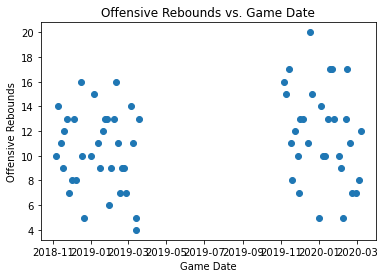

In [5]:
plt.scatter(x= combo["Date"],y=combo["ORB"])
plt.xlabel("Game Date")
plt.ylabel("Offensive Rebounds")
plt.title("Offensive Rebounds vs. Game Date")

To start my exploratory analysis, I tried to visualize ORB vs. date to see if there was improvement over time. This improvement over time could show a link between increased offensive rebounding and wins. Just from observing, you can see that there is some improvement over the two seasons, but it seems uncorrelated within each season, as shown by the following scatter plot.

Text(0.5, 1.0, 'Offensive Rebounds vs. Game Date')

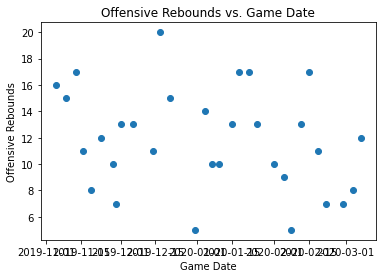

In [6]:
plt.scatter(x=season_2019["Date"],y=season_2019["ORB"])
plt.xlabel("Game Date")
plt.ylabel("Offensive Rebounds")
plt.title("Offensive Rebounds vs. Game Date")

As this visualization shows, there is not a real link between Offensive rebounding and time in this situation, and any calculation involving these two statistics would prove that. Therefore, I moved on to offensive rebounds vs. wins and losses as that might be a better indicator for how Providence improved over the year, and show the correlation needed to prove a connection between turnarounds and offensive rebounding statistics.

Text(0.5, 1.0, 'Offensive Rebounds vs. Game Result')

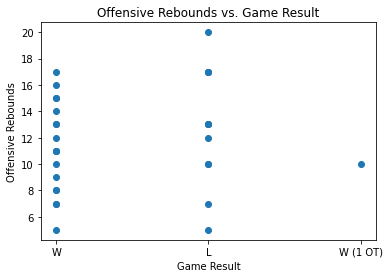

In [7]:
plt.scatter(x=season_2019["W/L"],y=season_2019["ORB"])
plt.xlabel("Game Result")
plt.ylabel("Offensive Rebounds")
plt.title("Offensive Rebounds vs. Game Result")

Once I saw that there was little correlation over one season in offensive rebounds vs time, I tried to compare offensive rebounds to wins and losses. Similarly there was little correlation over one season. 

Text(0.5, 1.0, 'Total Rebounds vs. Game Result')

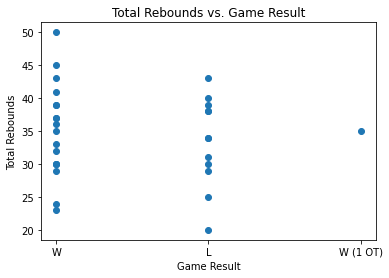

In [8]:
plt.scatter(x=season_2019["W/L"],y=season_2019["TRB"])
plt.xlabel("Game Result")
plt.ylabel("Total Rebounds")
plt.title("Total Rebounds vs. Game Result")

I then plotted wins and total rebounds and there seemed to be a stronger connection. I decided to attempt to calculate the difference in rebounds between PC and their opponent over each game to see if there was a stronger and more reliable connection there. 

Text(0.5, 1.0, '2019 Rebounding Difference vs. Game Result')

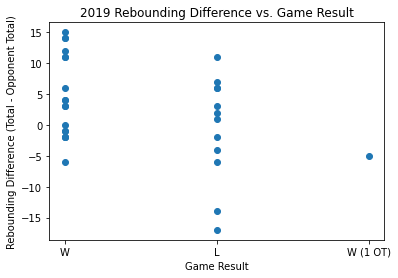

In [11]:
plt.scatter(x=season_2019["W/L"],y=(season_2019["TRB"]-season_2019["OTRB"]))
plt.xlabel("Game Result")
plt.ylabel("Rebounding Difference (Total - Opponent Total)")
plt.title("2019 Rebounding Difference vs. Game Result")

The comparison of rebounding difference and game result seemed to be stronger, so I decided to test that statistic over the combination data set. 

Text(0.5, 1.0, 'Rebounding Difference vs. Game Result')

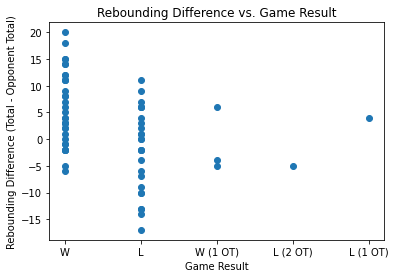

In [10]:
plt.scatter(x=combo["W/L"],y=combo["TRB"]-combo["OTRB"])
plt.xlabel("Game Result")
plt.ylabel("Rebounding Difference (Total - Opponent Total)")
plt.title("Rebounding Difference vs. Game Result")

I then moved on to plotting the two seasons together, and I noticed that the correlation looked even stronger, so I created numerical variables for rebounding difference and wins and losses to test the actual correlation. This is to see if I could verify whether or not rebounding difference between teams was a good determinant for first of all winning and second of all turning a team around, as most of Providence's wins came from the later half of the second season in this data set. 

In [8]:
combo[["numeric","reb_diff"]].corr()

,numeric,reb_diff
0,,
numeric,1.000000,0.446805
reb_diff,0.446805,1.000000


While this correlation is not very strong, basketball statistics have very little variation, so rebounding numbers tend to be very similar over wins and losses. Therefore, a correlation or r of .45 is not bad in terms of basic game statistics.

In [9]:
combo[["numeric","TRB"]].corr()

,numeric,TRB
0,,
numeric,1.000000,0.225584
TRB,0.225584,1.000000


I just tested the correlation of total rebounds and wins to verify that rebounding differnce had a stronger correlation, which it does. 

Text(0.5, 1.0, 'Opponent Field Goal Percentage vs. Game Result')

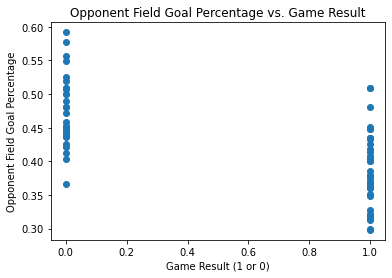

In [12]:
plt.scatter(x=combo["numeric"], y = combo["OFG%"])
plt.xlabel("Game Result (1 or 0)")
plt.ylabel("Opponent Field Goal Percentage")
plt.title("Opponent Field Goal Percentage vs. Game Result")

I then plotted wins vs opponent field goal percentage, as a simple way to test defensive efficiency, and there is a clear visual correlation.  

In [11]:
combo[["numeric","OFG%"]].corr()

,numeric,OFG%
0,,
numeric,1.000000,-0.628604
OFG%,-0.628604,1.000000


The correlation test shows a decently strong negative correlation between opponent field goal percentage and wins, which makes sense.

In [12]:
potential = total_rankings[total_rankings["diff"]>65]
potential_test = potential[potential["RK"]<100]
potential_test

,index,RK,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,diff
427,74,75,Creighton,BE,34,20,110.9,97.1,0.8229,56.2,...,27.9,55.7,52.9,37.9,35.0,70.1,-2.3,NaN,NaN,68.0
435,82,83,Dayton,A10,33,21,111.1,98.9,0.7915,56.1,...,23.8,59.5,47.7,33.2,32.1,66.1,-2.3,NaN,NaN,79.0
443,90,91,Providence,BE,34,18,104.3,95.0,0.7446,48.0,...,32.8,47.5,48.8,32.6,34.1,69.2,-3.4,NaN,NaN,66.0
444,91,92,Butler,BE,33,16,110.5,100.9,0.7394,52.1,...,36.3,51.4,52.2,35.3,35.7,67.2,-4.4,NaN,NaN,68.0
451,98,99,West Virginia,B12,36,15,108.8,100.7,0.7087,47.5,...,38.0,47.6,51.3,31.6,36.1,71.9,-3.7,NaN,NaN,83.0


Next I wanted to see what teams made a similar jump in ranking to Providence College, so I checked which teams had a ranking difference over 65, and to make sure the team was competitive, I made sure their worst ranking was better than 100th in the nation.

With this set of 5 teams, I created a combination dataset of all of their advanced statistics or sabermetric statistics from 2 seasons ago to see if I could find a statistic which helped to predict their collective jump as a group of teams. The five teams I am working with are Creighton, Dayton, Providence, Butler, and West Virginia. Throughout the testing of the first hypothesis, I will be using the black marker to signify Providence, the red marker to signify Dayton, the blue marker to signify Butler, the green marker to signify Creighton, and finally the yellow marker to signify West Virginia.

## Hypothesis #1

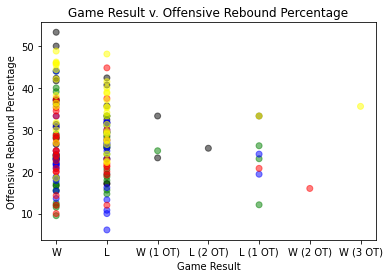

In [19]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["ORB%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Offensive Rebound Percentage")
ax.set_xlabel("Game Result")
ax.set_ylabel("Offensive Rebound Percentage")
plt.show()


This graph shows a decent correlation between game result and offensive rebound percentage or the percent of offensive rebounds that a team got from the total possible rebounds they could have gotten at that end of the court.

In [14]:
fit = LogisticRegression().fit(advanced_combo[["ORB%"]],advanced_combo["numeric"])
fit.score(advanced_combo[["ORB%"]],advanced_combo["numeric"])

0.5029239766081871

As predicted, the logistic regression was able to accurately predict around 50% of game results given Offensive rebounding percentage, which is decent, but in terms of a binary variable like wins and losses, I would hope for a better correlation between a predictive statistic and game result. 

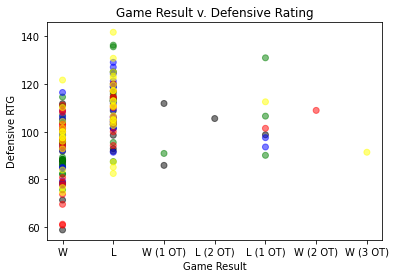

In [20]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["DRtg"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Defensive Rating")
ax.set_xlabel("Game Result")
ax.set_ylabel("Defensive RTG")
plt.show()

Next, I tested game result versus Deffensive rating which is calculated by seeing how many points the opposing team would score in 100 possessions. Therefore the negative correlation between wins and deffensive rating is what we expect when visualizing this data. 

In [28]:
fit2 = LogisticRegression().fit(advanced_combo[["DRtg"]],advanced_combo["numeric"])
fit2.score(advanced_combo[["DRtg"]],advanced_combo["numeric"])

0.7602339181286549

The logistic regression was able to predict about 76% of game results correctly given deffensive rating, which is a much better result than seen with offensive rebounding percentage. Obviously you are never going to get a perfect predictor of game results, so 76% is quite strong. This result is important because it gives credance to the hypothesis that teams with good deffensive ratings in their wins will most likely beat expectations in the coming year.

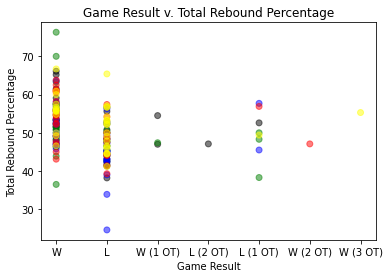

In [21]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["TRB%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Total Rebound Percentage")
ax.set_xlabel("Game Result")
ax.set_ylabel("Total Rebound Percentage")
plt.show()

Next, I looked at game result versus total rebounding percentage which is the same as offensive rebounding percentage, but it includes rebounds on both ends of the floor instead of just one. This, visually, also seemed to be a good predictor of game results, so I decided to test the predictive ability of total rebound percentage.

In [27]:
fit3 = LogisticRegression().fit(advanced_combo[["TRB%"]],advanced_combo["numeric"])
fit3.score(advanced_combo[["TRB%"]],advanced_combo["numeric"])

0.7017543859649122

The logistic regression when given total rebounding percentage was able to predict game results with a 70% accuracy, which again is better than offensive rebounds, but not as good as deffensive rating or efficiency. With this result, we can say that when teams beat expectations, they often have impressive total rebounding percentages in their wins in the previous year.

In [19]:
fit2.coef_

array([[-0.11571597]])

This is the slope of the best fit line of the logistic regression of deffensive efficiency and game result. This is a promising result because first of all we are expecting a negative correlation between these two statistics, and it shows that one outlier or incredible defensive performance is not skewing the data, but instead, it shows that most of the results are generally the same, but better deffensive performances are slightly more likely to result in a win, which is exactly what you expect given the low variation of certain statistics in basketball. 

In [20]:
fit3.coef_

array([[0.17985684]])

This is the slope of the best fit line of the logistic regression of total rebounding percentage and game result. Similarly to the last result, this result is positive because it shows that our predictive abilities from total rebounding percentage are not skewed by one really good rebounding performance in a win, but instead, it shows that all of the rebounding statistics from game to game are similar, but there is a slight rise in wins which you would expect given the low variation of statistics in basketball.

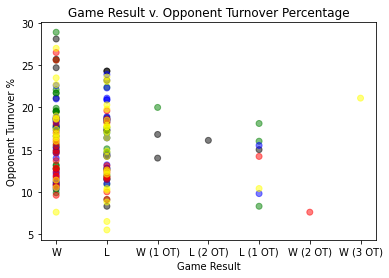

In [22]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["OTOV%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Opponent Turnover Percentage")
ax.set_xlabel("Game Result")
ax.set_ylabel("Opponent Turnover %")
plt.show()

I then decided to analyze the four statistics that go into deffensive rating to see if any one specfically stood out in terms of predictive ability in wins. From this graph, you can see a decent correlation between game result and opponent turnover percentage or the amount of possessions that ended in turnovers over all possessions. 

In [22]:
fit4 = LogisticRegression().fit(advanced_combo[["OTOV%"]],advanced_combo["numeric"])
fit4.score(advanced_combo[["OTOV%"]],advanced_combo["numeric"])

0.5672514619883041

The logistic regression was only able to predict the game result based off of opponent turnover percentage 56% of the time, which while better than 50%, is not strong enough to really conclude anything about the effect opponent turnover rate has on game result and then team turnarounds in general.

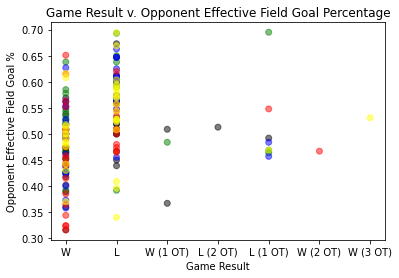

In [23]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["OeFG%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Opponent Effective Field Goal Percentage")
ax.set_xlabel("Game Result")
ax.set_ylabel("Opponent Effective Field Goal %")
plt.show()

Next I looked at the connection between opponent effective field goal percentage, which accounts for the fact that three point shots count for more, so they are given more cushion when calculating this percentage, versus game result. Visually there is a decent negative correlation between game result and opponent effective field goal percentage. Opponent effective field goal percentage is the second indicator in deffensive rating. 

In [24]:
fit5 = LogisticRegression().fit(advanced_combo[["OeFG%"]],advanced_combo["numeric"])
fit5.score(advanced_combo[["OeFG%"]],advanced_combo["numeric"])

0.6842105263157895

When I plugged these two statistics into the logistic regression, however, the regression was only able to predict 68% of the results, which while decent is not enough to conclude anything about the correlation between game result and opponent effective field goal percentage or the opponent's effective field goal percentage and a team's turnaround the following year.

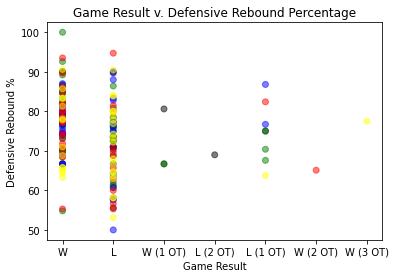

In [24]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["ODRB%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Defensive Rebound Percentage")
ax.set_xlabel("Game Result")
ax.set_ylabel("Defensive Rebound %")
plt.show()

Next, I looked at deffensive rebounding percentage and game result to see if there was a correlation between the third in depth statistic which is an indicator of defesnive rating. Defensive rebounding percentage is the same as offensive rebounding percentage, just it occurs on the opposite side of the floor. Visualy, there is a decent correlation between defensive rebounding percentage and game result.

In [26]:
fit6 = LogisticRegression().fit(advanced_combo[["ODRB%"]],advanced_combo["numeric"])
fit6.score(advanced_combo[["ODRB%"]],advanced_combo["numeric"])

0.6198830409356725

Once I plugged these statistics into the logistic regression however, the regression was only able to predict game result 62% of the time when given deffensive rebounding percentage, which is better than completely random, but again is not enough to make any conclusions based off of the given statistic.

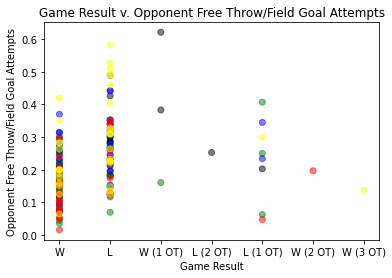

In [25]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["OFT/FGA"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
ax.title.set_text("Game Result v. Opponent Free Throw/Field Goal Attempts")
ax.set_xlabel("Game Result")
ax.set_ylabel("Opponent Free Throw/Field Goal Attempts")
plt.show()

Then, I looked at the final indicator of deffensive rating, Opponent Free Throws over field goal attempts, versus game result. This statistic looks at the percentage of shots which a shooting foul occurs which is a good indicator for defensive rating. Again there is a decently strong visual correlation between opponent free throws per field goal attempts. 

In [28]:
fit7 = LogisticRegression().fit(advanced_combo[["OFT/FGA"]],advanced_combo["numeric"])
fit7.score(advanced_combo[["OFT/FGA"]],advanced_combo["numeric"])

0.6608187134502924

The logistic regression, when given opponent free throws per field goal attempts and game result only correctly predicted game result 66% of the time. Again this is better than a completely random guess at the statistic, but it is still not very strong when predicting a binary statistic. Therefore we cannot make a conclusion about any of the indicator statistics individually and their effect on game results.

## Test of The Significance of the Defensive Rating 

In [75]:
defensive_rtg_avg = 97.93 ##from sports reference big east table

Just as a note for the block below, I had to take the season long defensive ratings from sports reference because defensive rating for a season is not just an average of each game, but weighted by each possesion which shifts from game to game.

In [83]:
##Season long defensive ratings:
P_defensive_rtg = 94.7 ##providence
C_defensive_rtg = 99.3 ##creighton
B_defensive_rtg = 95.8 ##butler
D_defensive_rtg = 93.9 ##dayton
WV_defensive_rtg = 89.6 ##west virginia

In [84]:
season_length = 31

I chose a poisson distribution to test the significance of each rating because, in general, basketball statistics follow poisson distributions.

In [87]:
sd = np.sqrt(defensive_rtg_avg)/31 ## setting up a standard deviation for the normal season

In [89]:
print(defensive_rtg_avg-sd*3 < P_defensive_rtg)
print(defensive_rtg_avg-sd*3 < C_defensive_rtg)
print(defensive_rtg_avg-sd*3 < B_defensive_rtg)
print(defensive_rtg_avg-sd*3 < D_defensive_rtg)
print(defensive_rtg_avg-sd*3 < WV_defensive_rtg)

False
True
False
False
False


For all of the teams, except for Creighton, their defensive ratings are statistically significant when compared to the average of a defensively strong division, in the Big East. 

## Hypothesis #2

Next, I started working on whether or not the improvements of any specific player made a difference in Providence's season. Specifically I wanted to look at players who had improved at Total rebounding percentage and deffensive rating, but since deffensive rating is a team only statistic, I was only able to look at improvements in Total rebounding percentage.

To determine which players to look at, I took the top four players in terms of the total rebounding percentage which happened to be Alpha Diallo, Kalif Young, Nate Watson, and Emmit Holt.  

In [41]:
AD_reb, KY_reb, NW_reb, EH_reb = rebounders["TRB%"]
print(AD_reb, KY_reb, NW_reb, EH_reb)

13.0 13.6 13.4 13.3


In [30]:
AD_avg = 12.1
KY_avg = 14.1
NW_avg = 11.6
EH_avg = 12.5 

Then I found their total rebounding percentage from the 2019 season and confirmed that it was larger than their previous season and average over their careers. This was true for all of the players except for Kalif Young whose average total rebounding percentage was 14% which is greater than his rebounding percentage from 2019 of 13.6%

In [31]:
AD_games = 130/4
NW_games = 96/3
EH_games = 94/4

I then found the average games for each player so that I could accurately simulate a season which related to their average playing time over a season. I used total games played and total years played to determine these average games in a season

In [32]:
AD_season_mean = np.zeros(1000)
for i in range(1000):
    AD_season_mean[i]=np.random.poisson(AD_avg,size = int(AD_games)).mean()
NW_season_mean = np.zeros(1000)
for i in range(1000):
    NW_season_mean[i]=np.random.poisson(NW_avg,size=int(NW_games)).mean()
EH_season_mean = np.zeros(1000)
for i in range(1000):
    EH_season_mean[i]=np.random.poisson(EH_avg,size=int(EH_games)).mean()

I then simulated 1000 seasons for each player following a poisson distribution and having their average total rebounding percentage as the lambda. I assumed their statistics followed a poisson distribution as most basketball statistics do especially those regarding rebounds, given I was not able to take the individual game total rebound percentage, and three or four years of data is too small to accurately determine which distribution a set of data fits. 

<function matplotlib.pyplot.show(*args, **kw)>

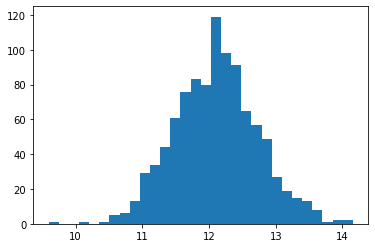

In [33]:
plt.hist(AD_season_mean,bins=30)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

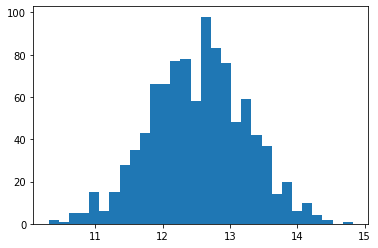

In [34]:
plt.hist(EH_season_mean,bins=30)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

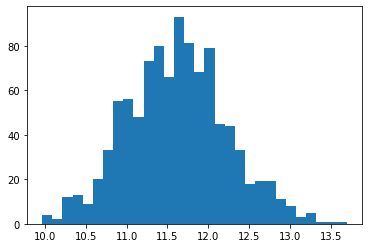

In [35]:
plt.hist(NW_season_mean,bins=30)
plt.show

I then printed all of their distributions of 1000 simulations of total rebounding percentage in a season, and visually at least, each of Diallo's, Watson's, and Holt's seasons seemed to be outliers when compared to the graphs of 1000 simulated seasons. 

In [38]:
AD_sd = np.sqrt(AD_avg)/int(AD_games)
EH_sd = np.sqrt(EH_avg)/int(EH_games)
NW_sd = np.sqrt(NW_avg)/int(NW_games)

Then I calculated the standard deviations to see if there was a statistical significance in the difference between each players' rebounding statistics for this season and their average. 

In [37]:
AD_avg+(AD_sd*3)

12.426109883704864

In [39]:
EH_avg+(EH_sd*3)

12.96115659642601

In [40]:
NW_avg+(NW_sd*3)

11.91930099436112

Through this calculation, you can see that all three players' total rebounding percentage falls outside of three standard deviations away from their mean season when 1000 seasons are simulated. Therefore we can conclude that all three players have had a better year than normal in terms of total rebounding percentage which most definitely has helped in Providence College's turnaround over the season.

*Evaluation of Significance:* <br />
For the team general statistics, I set the minimum predictive accuracy at 70% because while predicting game results off of one basketball statistic is challenging, wins and losses are binary statistics so over 2/3rds accuracy should be achieved when a statistic actually has a solid predictive capability. Also, the coefficients for both total rebounding percentage show that these results are not random or skewed by one game but slight yet noticeable differences in statistics given a win or a loss. To prove its significance, I tested the statistical significance of the defensive rating of each of the five teams, and they were all statistically significant at the .001 significance level bar Creighton. <br/> 
<br /> 
For the player specific statistics, I set the alpha value for the hypothesis test at .001 because I wanted to be very strict given the small sample size of seasons for each player. Even with this strict alpha value, each player's growth was statistically significant.

*Conclusion:* <br />
While not entirely conclusive, the evidence from this analysis shows that teams which experience a turnaround generally have strong correlations between their deffensive performaces and wins, and rebounding performances and wins in the season before their turnaround. The 76% and 70% prediction accuracy respectively for these two statistics is quite strong given they are basketball statistics, and point towards the idea that teams with solid defensive and rebounding foundations will experience turnarounds in the coming years. Similarly, the evidence from the analysis of the players shows that teams that experience a turnaround are likely to have multiple players who have statistically significant improvements in rebounding statistics.  

Data Limitations: <br /> 
I was able to find sabermetric tables for Providence as well as the other picked teams, so there were no limitations from the team dataset point of view. From the player dataset point of view, though, there were no compilations of game by game sabermetric statistics, only season long sabermetric statistics, and these statistics are not calculatable from basic statistics, so I was forced to work with year long averages only. <br /> 
<br />
In terms of testing the significance of my findings, I could only find the season long defensive effeciency of the 5 teams, and not their season long total rebound percentage, so I could not test the significance of those statistics.

For the NCAA Rankings, there are a couple of limitations. First, the rankings are not NCAA net rankings (I got those directly from NCAA archive of rankings for the introduction), but instead they are barttovik's power rankings. While these do take into account results, they are also based off of offensive and defensive efficiency, which means they could have some natural correlation with the basic statistics. This would be a massive problem if I were using that dataset to test the correlation between success and statistics, but I am planning on only using that dataset to determine the teams that have made ranking jumps, so that I can acquire and then analyse the statistics for that team specifically. Otherwise, this dataset is very well compiled and cleaned, so thank you to Andrew Sundberg.

*Appendix:* <br />
<br />
*Data Cleaning*: <br />
I downloaded most of my data into excel, so there was a decent amount of data cleaning required. First things firs, I had to rename the columns and drop the first row because the panda.read did not interpret the column names as column names, but as the first row instead. After that, I reset the index of the data frame then went forward. For the providence college data sets, I had multiple either empty columns or columns with no name, so I hard coded the name in by counting to see the index of each missing column, and then either renamed the column or dropped it. Next, The game site column had empty values instead of saying home, so I filled the empty values with home and I left the other values as @ (away) and N (neutral). I then fixed the column names by changing the opponent's stats to have O infront of all of the column names. Next, I created a combo dataframe as to better compare the two seasons together/ the changes over time. Then I created a couple new stats to help me specifically test rebounds against wins. Finally, I made sure all applicable stats were floats instead of objects so that I could actually test their correlation with wins and losses. <br /> 
<br /> 
Next, I downloaded season rankings (2018 and 2019 seasons) from kaggle, put them together, reset the index, then created a new column which showed the difference in rank over the two years, so that I can find what other teams to analyse. <br />
<br />
**Update:** I downloaded a new set of 5 teams and their Sabermetric statistics from the 2019-2020 season. I downloaded these datasets to excel and basically followed the same plan from the first set of season long data. After renaming the columns for each of the 5 datasets and doing the macro cleaning (ie: making a column to serve as a marker for each team and deleting the empty columns so each dataset fits with one another, I put them all together into one dataset, so I could actually do some analysis. Once I had this compiled dataset, I renamed the columns which held opponent or defensive information to differentiate those columns from the offensive information. Finally, I changed all of the data to floats and strings instead of objects so I could actually run analysis. <br /> 
<br />
For the player data set, I downloaded the sabermetric data for the players on Providence in the 2019-2020 season, and then just created a new column to rank the rebounding metrics for each player, so that I could select the 4 best preforming rebounders during my data analysis to see if they had a statistically significant year in terms of rebounding. 